In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('salary.csv')
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [4]:
print(data['YearsExperience'].corr(data['Salary']))

0.9782416184887599


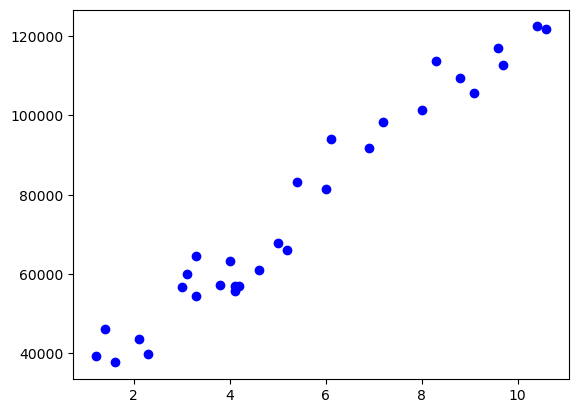

In [5]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'blue')

In [6]:
def linear_regression(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    for i in range(n):
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary
        
        m_gradient += -(2/n) * x *(y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b  = b_now - b_gradient * L
    return m, b

m = 0
b = 0
L = 0.001

for i in range(500):
    m, b = linear_regression(m, b, data, L)
print(m, b)


12194.43088292167 6148.723858573819


In [7]:
from sklearn.metrics import r2_score

y_true = data['Salary'] 
x_vals = data['YearsExperience']

y_pred = m * x_vals + b
r2 = r2_score(y_true, y_pred)

print(r2)

0.8559167664829218


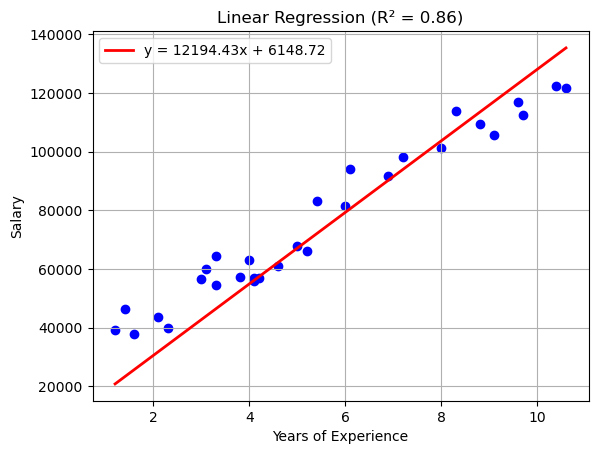

In [8]:
plt.scatter(data['YearsExperience'], data['Salary'], color='blue')

x_line = np.linspace(data['YearsExperience'].min(), data['YearsExperience'].max(), 100)
y_line = m * x_line + b

plt.plot(x_line, y_line, color='red', linewidth=2, label =f"y = {m:.2f}x + {b:.2f}")
plt.legend()
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(f'Linear Regression (R² = {r2:.2f})')
plt.grid(True)

In [12]:
x = data[['YearsExperience']]
y = data['Salary']

model = LinearRegression()
model.fit(x, y)

print("b :", model.intercept_)
print("m :", model.coef_[0])

y_true = data['Salary'] 
x_vals = data['YearsExperience']

y_pred = m * x_vals + b
r2 = r2_score(y_true, y_pred)

print(r2)



b : 24848.203966523222
m : 9449.962321455072
0.8559167664829218
